Phân vùng theo histogram

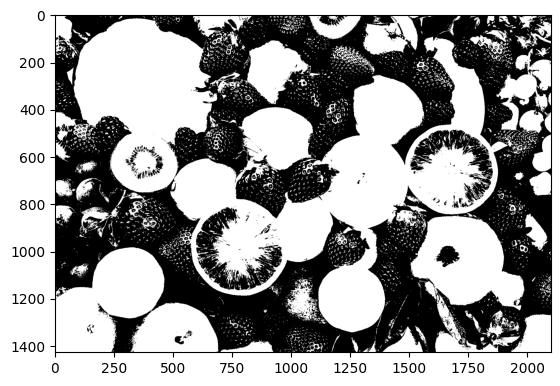

In [ ]:
# Phương pháp Otsu's thresholding
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu

data = Image.open('exercise/fruit.jpg').convert('L')
a = np.asarray(data)

# performing Otsu's thresholding
thresh = threshold_otsu (a)

# pixels with intensity greater than theshold are kept
b = a > thresh
b = Image.fromarray (b)
plt.imshow(b)

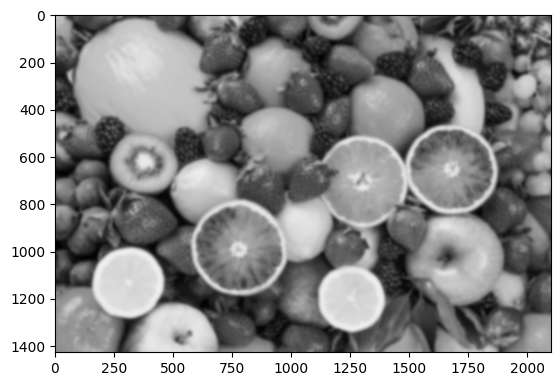

In [3]:
# Phương pháp Adaptive thresholding
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_local

data = Image.open('exercise/fruit.jpg').convert('L')
a = np.asarray(data)

# performing adaptive thresholding
b = threshold_local(a, block_size=35, offset=10)
b = Image.fromarray(b)
plt.imshow(b)
plt.show()




Phân vùng theo region

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ------ --------------------------------- 6.8/39.5 MB 46.3 MB/s eta 0:00:01
   ----------- ---------------------------- 11.3/39.5 MB 31.7 MB/s eta 0:00:01
   ----------------------- ---------------- 23.1/39.5 MB 42.9 MB/s eta 0:00:01
   --------------------------------- ------ 33.6/39.5 MB 43.9 MB/s eta 0:00:01
   ---------------------------------------  39.3/39.5 MB 40.5 MB/s eta 0:00:01
   ---------------------------------------- 39.5/39.5 MB 38.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


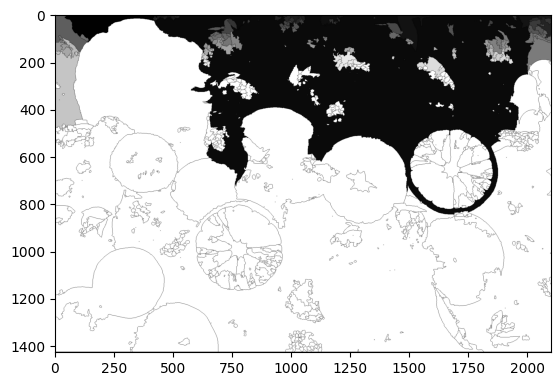

In [6]:
%pip install opencv-python

import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# Read the image
data = cv2.imread('exercise/fruit.jpg')

# covnerting image from color to grayscale
a = cv2.cvtColor (data, cv2.COLOR_BGR2GRAY)

# thresholding the image to obtain cell pixels
thresh, bl = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# since Otsu's method has over segmented the image

# erosion operation is performed
b2 = cv2.erode (bl, None, iterations = 2)

# distance transform is performed
dist_trans = cv2.distanceTransform (b2, 2, 3)

# thresholding the distance transform image to obtain
# pixels that are foreground
thresh, dt = cv2.threshold (dist_trans, 1, 255, cv2.THRESH_BINARY)

# performing labeling
labelled, ncc = label (dt)

# labelled is converted to 32-bit integer
labelled = labelled.astype (np.int32)

# performing watershed
cv2.watershed(data, labelled)
b = Image.fromarray (labelled)
plt.imshow (b)
plt.show ()

Biến đổi đối tượng trong ảnh

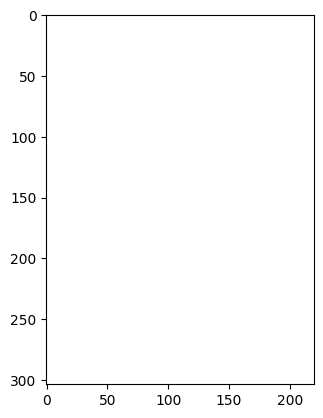

In [ ]:
#  Sử dụng binary_dilation
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('exercise/ye.gif').convert('L')
b = nd.binary_dilation(data, iterations=50)

# converting the binary image to PIL Image format
c= Image.fromarray(b)
c.show()
plt.imshow (c)
plt.show ()


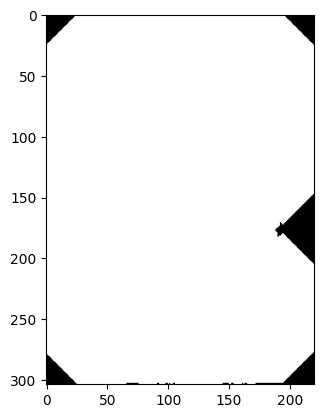

In [ ]:
# Sử dụng binary_opening
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('exercise/ye.gif').convert('L')

# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_opening (data, structure=s, iterations=25)

# converting the binary image to PIL Image format
c = Image.fromarray(b)
c.show ()
plt.imshow(c)
plt.show ()


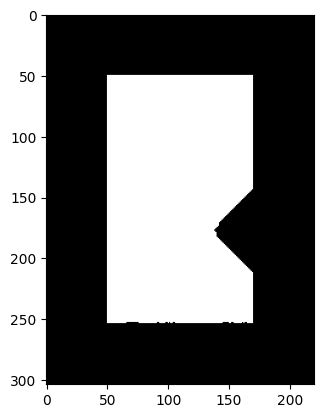

In [ ]:
#  Sử dụng binary_erosion
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('exercise/ye.gif').convert('L')

# defining the structuring element
s = [0, 1, 0], [1, 1, 1], [0, 1, 0]
b = nd.binary_erosion(data, structure=s, iterations=50)

# converting the binary image to PIL Image format
c = Image.fromarray (b)
c.show ()
plt.imshow (c)
plt.show ()


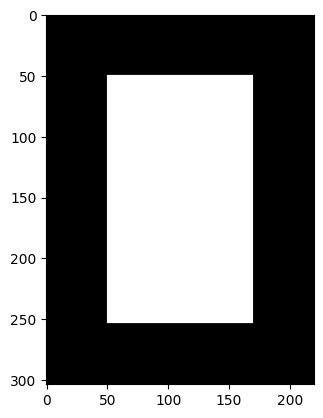

In [16]:
# Sử dụng binary_closing
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as np
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('exercise/ye.gif').convert('L')

# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_closing (data, structure=s, iterations=50)
c= Image.fromarray (b)
c.show ()
plt.imshow(c)
plt.show ()


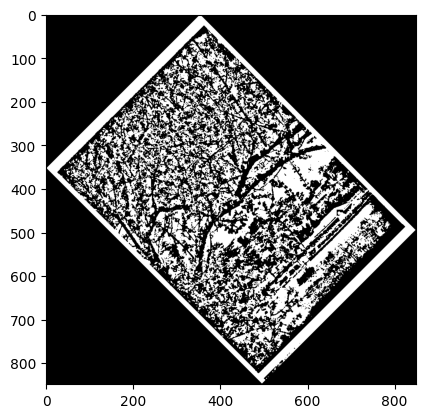

In [ ]:
# bai tap 2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_local

data = Image.open('exercise/dalat.jpg').convert('L')
data = np.asarray(data)

HXH = data[0:700, 500:1000]
HXH_rotated = nd.rotate(HXH, 45, reshape=True)

a = threshold_local(HXH_rotated, block_size=61, offset=0)
b = HXH_rotated > a

iio.imsave('exercise/Ho_Xuan_Huong.jpg', (b * 255).astype(np.uint8))
b = Image.fromarray(b)
plt.imshow(b)
plt.show()



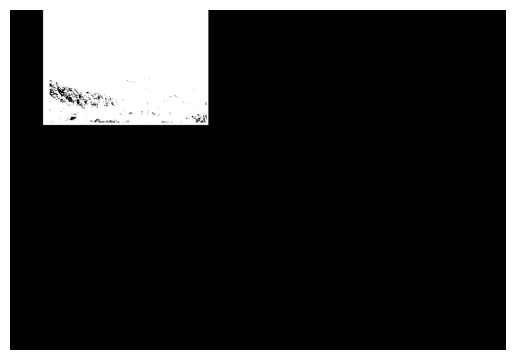

In [ ]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu

data = Image.open('exercise/dalat.jpg').convert('L')
data = np.asarray(data)

langbiang = data[0:350, 0:500]

canvas = np.zeros_like(data)
canvas[0:350, 100:600] = langbiang

thresh = threshold_otsu(langbiang * 0.3)
binary = canvas > thresh

iio.imsave('lang_biang.jpg', (binary * 255).astype(np.uint8))
plt.imshow(binary, cmap='gray')
plt.axis('off')
plt.show()
